In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
df=pd.read_csv('ML-Om1.csv')
#print (df.to_string())
df
#divide this df into data and target, X=df ka data, y=df ka target
#X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=__, random_state=___)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape


(569, 32)

In [ ]:
Y_col = 'diagnosis'
X_cols = (df.loc[:, df.columns != Y_col].columns).drop('id')
Y_col
X_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df1=df.dropna()
df1.shape

(563, 32)

In [ ]:
df_train = df1.sample(frac=0.67, random_state=1)
df_test=df1.drop(df_train.index)
print (df_train.shape, df_test.shape)

(377, 32) (186, 32)


In [ ]:
X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = (((df_train[Y_col]).apply(ord))/11-6).astype('int')
y_test = (((df_test[Y_col]).apply(ord))/11-6).astype('int')
#malignant is 1 benign is 0
print (y_train, y_test)
#for i in y_train:
  #if i=='M':
    #i=1
  #else:
    #i=0
#for i in y_test:
  #if i=='M':
    #i=1
  #else:
    #i=0
#print (y_train, y_test)

47     1
244    1
277    1
366    1
505    0
      ..
565    1
343    1
45     1
303    0
479    1
Name: diagnosis, Length: 377, dtype: int64 2      1
7      1
10     1
15     1
20     0
      ..
538    0
541    0
546    0
557    0
561    0
Name: diagnosis, Length: 186, dtype: int64


In [ ]:

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


In [ ]:
print(X_train.shape, y_train.shape)

(377, 30) (377,)


In [ ]:
class LogisticRegression():

  def __init__(self, lr, p_thresh, n_iters=1000):
    self.lr=lr
    self.p_thresh=p_thresh
    self.n_iters= n_iters
    self.weights= None
    self.bias= None

  def batchfit (self, X, y):
    costl=[]
    el=[]
    n_samples, n_features= X.shape
    self.weights= np.zeros (n_features)
    self.bias= 0

    for i in range (self.n_iters):
      linear_pred= np.dot (X, self.weights)+ self.bias
      predictions= sigmoid(linear_pred)
      cost=(-1/n_samples)*np.sum((y*np.log(predictions) + (1-y)*np.log(1-predictions)))
      cost=np.squeeze(np.array(cost))
      dw= (1/n_samples) * np.dot(X.T, (predictions-y))
      db= (1/n_samples) * np.sum(predictions-y)

      self.weights= self.weights- self.lr*dw
      self.bias=self.bias - self.lr*db
      costl.append(cost)
      el.append(i)
    return costl, el

  def minifit (self, X, y):
    n_samples, n_features= X.shape
    self.weights= np.zeros (n_features)
    self.bias= 0
    costl=[]
    el=[]
    bs=20
    nb=n_samples//bs
    for i in range(self.n_iters):
      for j in range(nb):

        start=j*bs
        end=(j+1)*bs

        Xmini=X[start:end,:].reshape(bs,n_features)
        ymini=y[start:end].reshape(bs,)

        linear_pred= np.dot (Xmini, self.weights)+ self.bias
        predictions= sigmoid(linear_pred)

        dw= (1/bs) * np.dot(Xmini.T, (predictions-ymini))
        db= (1/bs) * np.sum(predictions-ymini)
        cost=(-1/n_samples)*np.sum((ymini*np.log(predictions) + (1-ymini)*np.log(1-predictions)))
        cost=np.squeeze(np.array(cost))
        self.weights= self.weights- self.lr*dw
        self.bias=self.bias - self.lr*db
      costl.append(cost)
      el.append(i)
    return costl, el


  def sgdfit (self, X, y):
    n_samples, n_features= X.shape
    self.weights= np.zeros (n_features)
    self.bias= 0
    costl=[]
    el=[]

    for i in range(self.n_iters):
      for j in range(n_samples):

        ramji=np.random.randint(0,n_samples)

        Xsgd=X[ramji,:].reshape(1,n_features)
        ysgd=y[ramji].reshape(1,)

        linear_pred= np.dot (Xsgd, self.weights)+ self.bias
        predictions= sigmoid(linear_pred)
        cost=(-1/n_samples)*np.sum((ysgd*np.log(predictions) + (1-ysgd)*np.log(1-predictions)))
        cost=np.squeeze(np.array(cost))
        dw= np.dot(Xsgd.T, (predictions-ysgd))
        db= np.sum(predictions-ysgd)

        self.weights= self.weights- self.lr*dw
        self.bias=self.bias - self.lr*db
      costl.append(cost)
      el.append(i)
    return costl, el




  def predict(self, X):

    linear_pred= np.dot(X, self.weights) +self.bias
    y_pred=sigmoid(linear_pred)

    #y_pred stores probs of testing data points

    class_pred= [0 if y< self.p_thresh else 1 for y in y_pred] #probability thresholds given: 0.5, 0.3, 0.4, 0.6, 0.7
    return class_pred


Batch
For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 89.24731182795699 %


<ipython-input-43-b7a130eae89e>:20: RuntimeWarning: divide by zero encountered in log
  cost=(-1/n_samples)*np.sum((y*np.log(predictions) + (1-y)*np.log(1-predictions)))
<ipython-input-43-b7a130eae89e>:20: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/n_samples)*np.sum((y*np.log(predictions) + (1-y)*np.log(1-predictions)))
<ipython-input-2-bb43d9876711>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


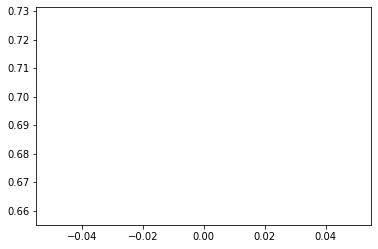

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 89.24731182795699 %


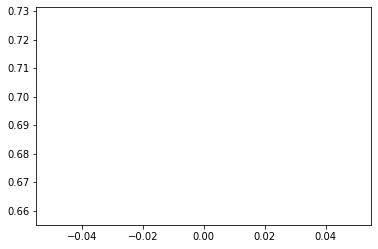

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 89.24731182795699 %


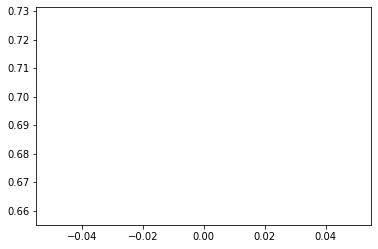

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 89.24731182795699 %


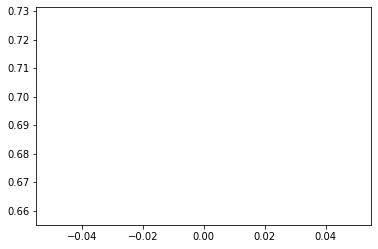

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 89.24731182795699 %


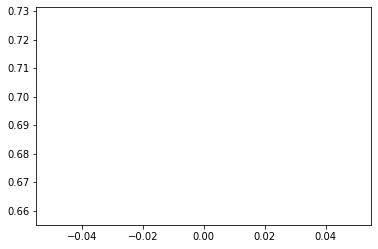

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 89.24731182795699 %


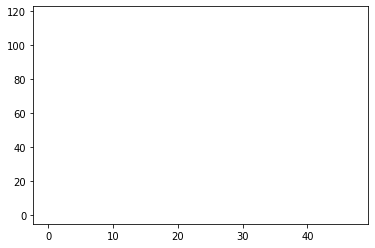

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 89.24731182795699 %


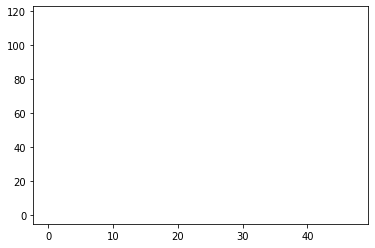

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 89.24731182795699 %


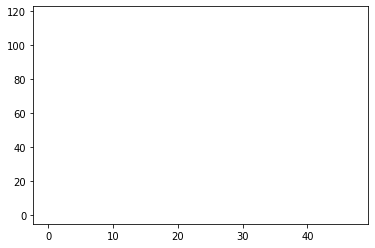

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 89.24731182795699 %


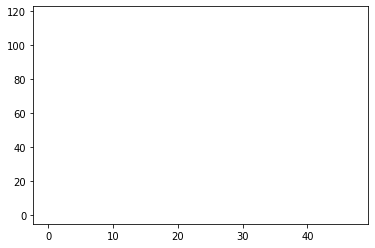

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 89.24731182795699 %


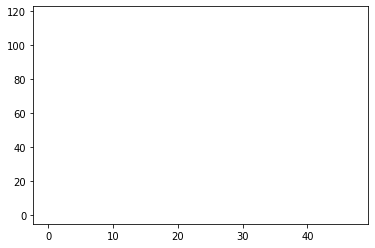

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 86.02150537634408 %


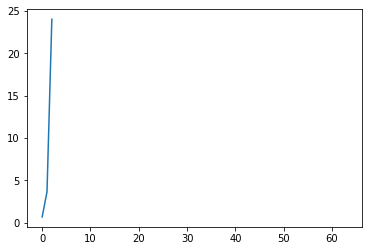

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 87.09677419354838 %


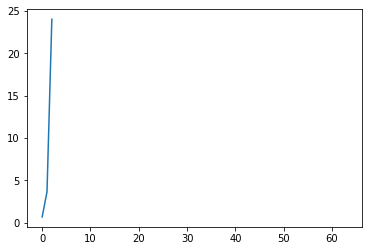

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 87.63440860215054 %


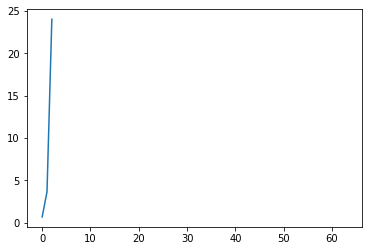

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 89.78494623655914 %


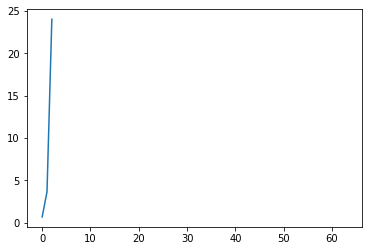

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 89.78494623655914 %


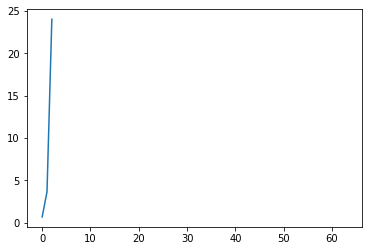

Mini Batch


<ipython-input-43-b7a130eae89e>:53: RuntimeWarning: divide by zero encountered in log
  cost=(-1/n_samples)*np.sum((ymini*np.log(predictions) + (1-ymini)*np.log(1-predictions)))
<ipython-input-43-b7a130eae89e>:53: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/n_samples)*np.sum((ymini*np.log(predictions) + (1-ymini)*np.log(1-predictions)))


For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 92.47311827956989 %


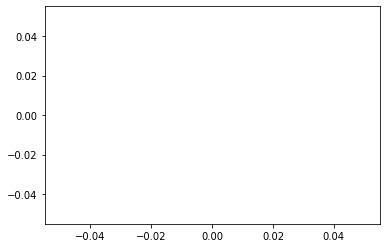

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 92.47311827956989 %


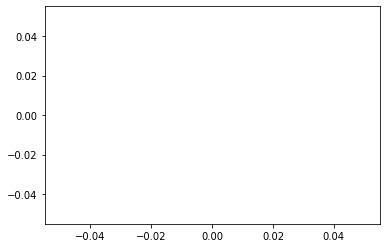

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 92.47311827956989 %


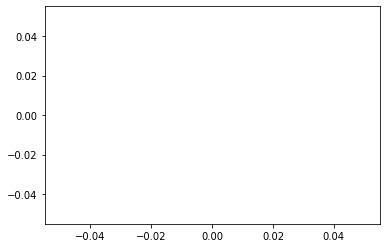

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 92.47311827956989 %


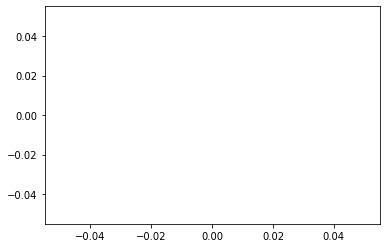

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 92.47311827956989 %


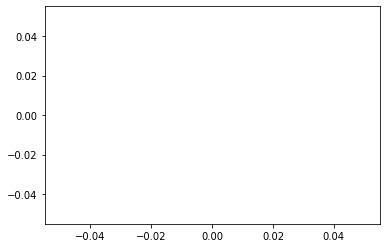

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 93.01075268817203 %


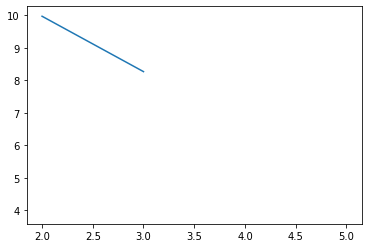

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 93.01075268817203 %


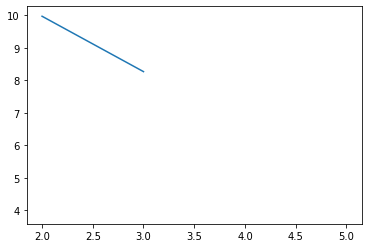

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 93.01075268817203 %


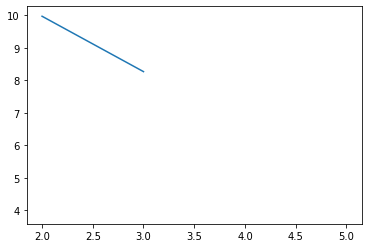

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 93.01075268817203 %


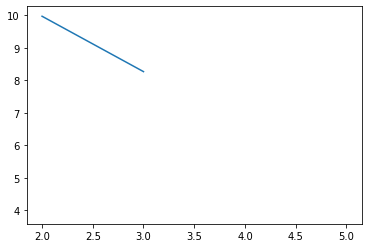

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 92.47311827956989 %


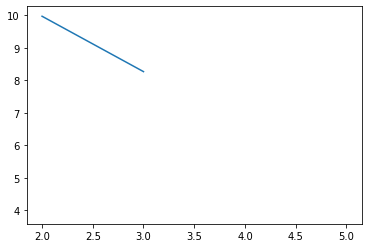

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 92.47311827956989 %


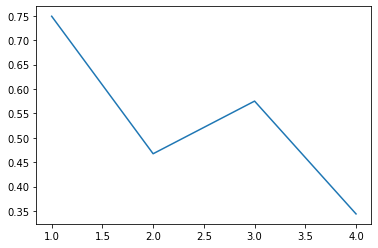

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 93.01075268817203 %


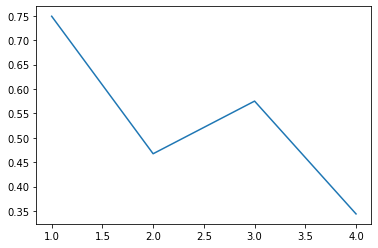

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 91.93548387096774 %


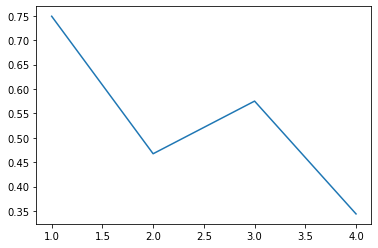

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 91.93548387096774 %


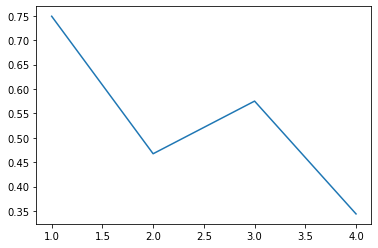

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 93.01075268817203 %


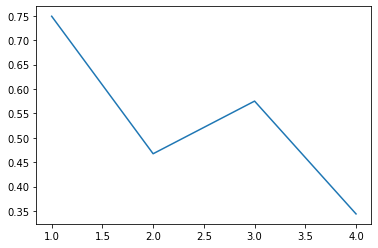

Stochastic


<ipython-input-43-b7a130eae89e>:79: RuntimeWarning: divide by zero encountered in log
  cost=(-1/n_samples)*np.sum((ysgd*np.log(predictions) + (1-ysgd)*np.log(1-predictions)))
<ipython-input-43-b7a130eae89e>:79: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/n_samples)*np.sum((ysgd*np.log(predictions) + (1-ysgd)*np.log(1-predictions)))


For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 76.88172043010752 %


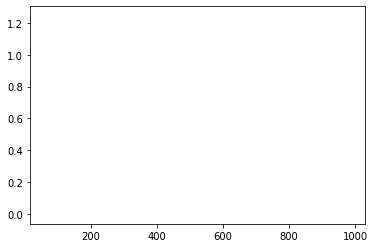

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 89.24731182795699 %


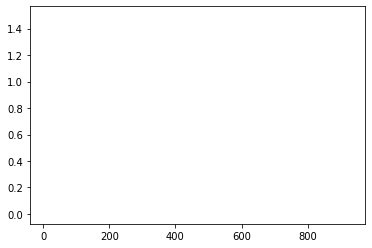

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 93.01075268817203 %


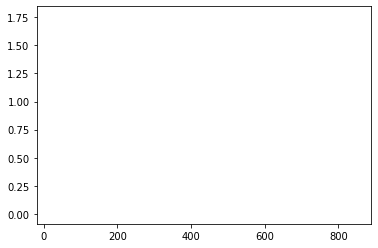

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 95.16129032258065 %


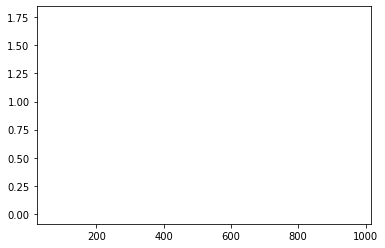

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 94.6236559139785 %


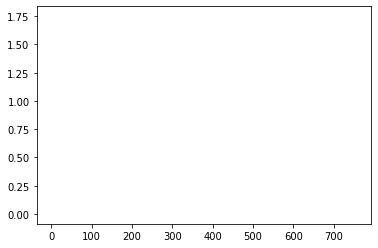

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 92.47311827956989 %


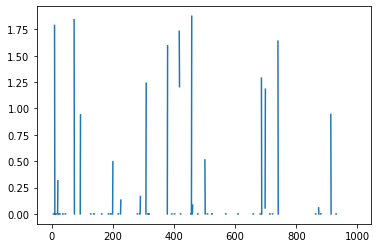

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 93.01075268817203 %


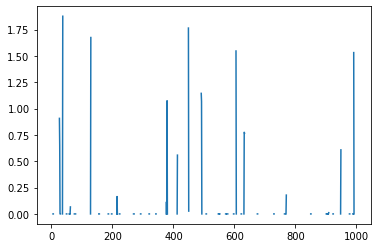

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 84.40860215053763 %


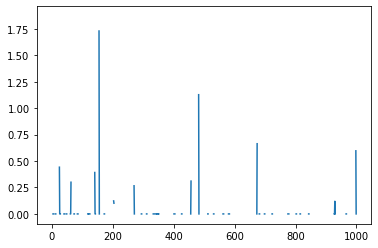

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 95.16129032258065 %


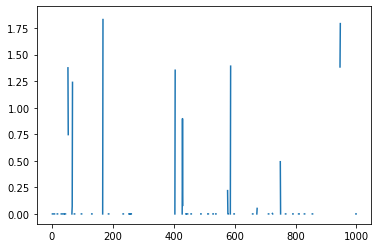

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 95.16129032258065 %


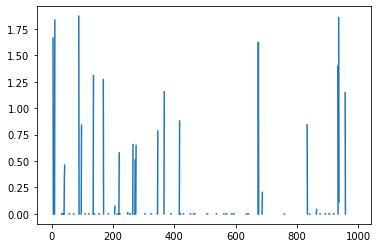

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 87.63440860215054 %


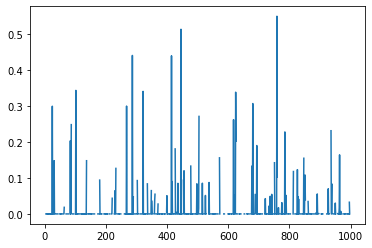

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 82.79569892473118 %


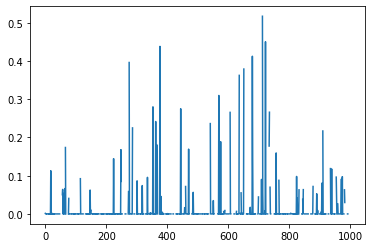

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 93.54838709677419 %


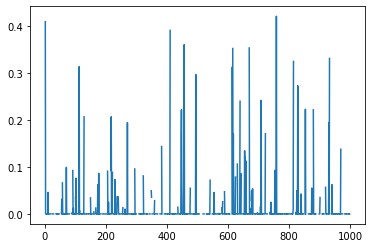

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 77.95698924731182 %


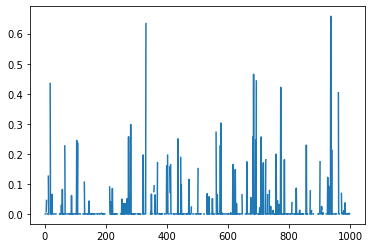

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 94.6236559139785 %


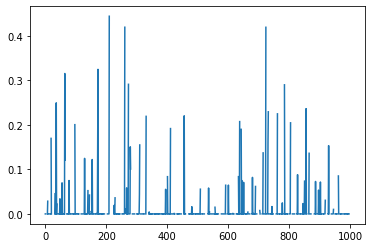

In [ ]:
l=[0.01,0.001,0.0001]
t=[0.3,0.4,0.5,0.6,0.7]
def accuracy (y_pred, y_test):
  return np.sum (y_pred==y_test)/len(y_test)

print("Batch")
for i in l:
  for j in t:
    LR1= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c, e = LR1.batchfit(X_train, y_train)
    y_pred=LR1.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()
print("Mini Batch")
for i in l:
  for j in t:
    LR1= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c, e = LR1.minifit(X_train, y_train)
    y_pred=LR1.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()
print("Stochastic")
for i in l:
  for j in t:
    LR1= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c, e = LR1.sgdfit(X_train, y_train)
    y_pred=LR1.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()

LR2

In [ ]:
df2=df
for i in df.columns:
  if df2[i].isnull().sum()==0:
    continue
  else:
    n=df.shape[0]-df2[i].isnull().sum()
    meanval=df[i].sum()/n
    df2[i].fillna(value=meanval, inplace=True)
print(df2.shape)

for i in df.columns:
  if i=='id' or i=='diagnosis':
    continue
  else:
    df2[i] = (df2[i] - df2[i].mean())/df2[i].std()

df_train = df2.sample(frac=0.67, random_state=1)
df_test=df2.drop(df_train.index)
print (df_train.shape, df_test.shape)

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = (((df_train[Y_col]).apply(ord))/11-6).astype('int')
y_test = (((df_test[Y_col]).apply(ord))/11-6).astype('int')


X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_train.shape, y_train.shape)

(569, 32)
(381, 32) (188, 32)
(381, 30) (381,)


Batch
For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 97.3404255319149 %


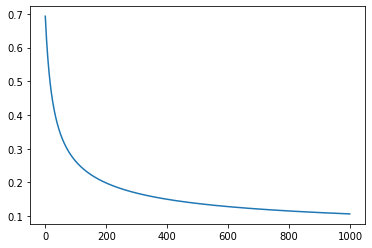

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 98.93617021276596 %


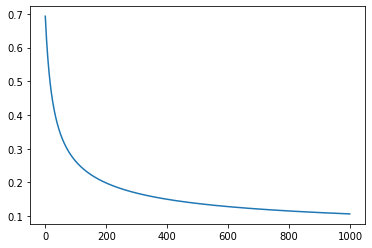

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 98.40425531914893 %


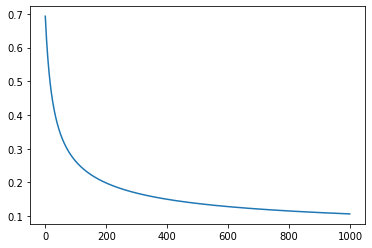

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 96.80851063829788 %


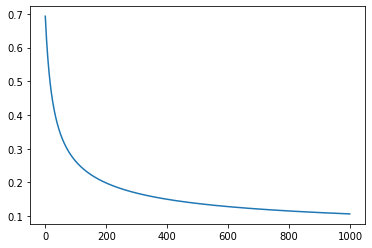

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 94.68085106382979 %


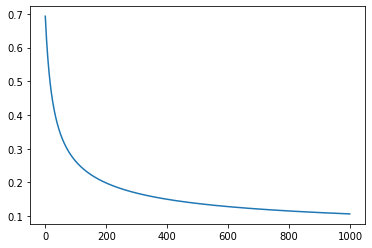

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 90.95744680851064 %


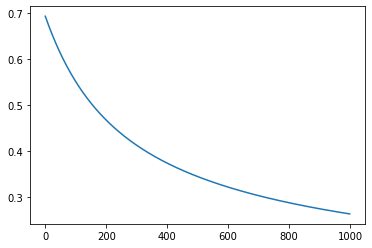

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 95.2127659574468 %


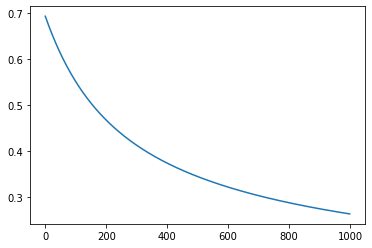

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 95.2127659574468 %


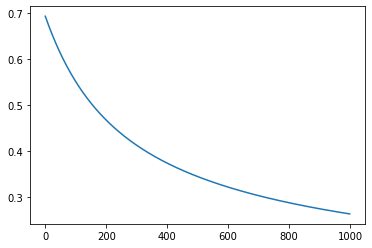

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 94.14893617021278 %


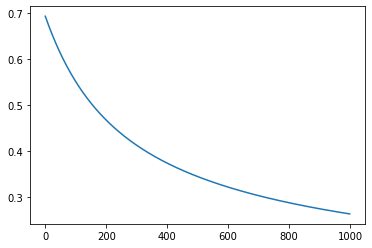

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 91.48936170212765 %


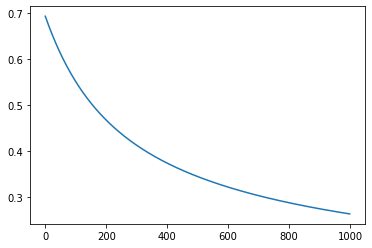

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 37.765957446808514 %


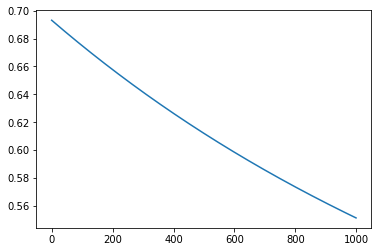

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 54.25531914893617 %


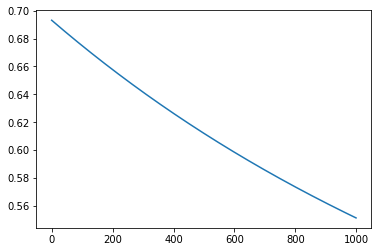

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 94.14893617021278 %


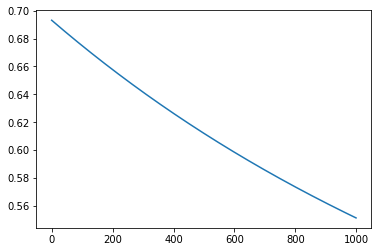

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 81.38297872340425 %


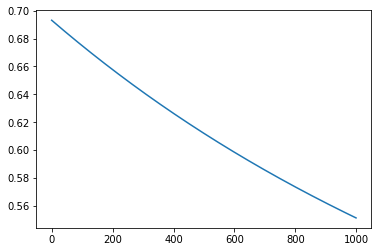

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 66.48936170212765 %


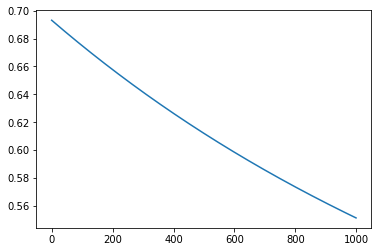

Mini Batch
For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 98.40425531914893 %


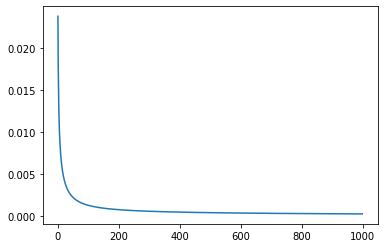

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 98.93617021276596 %


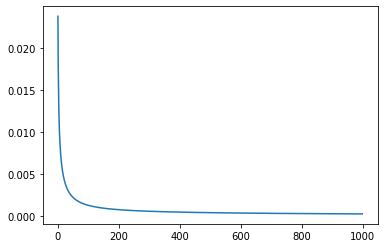

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 98.40425531914893 %


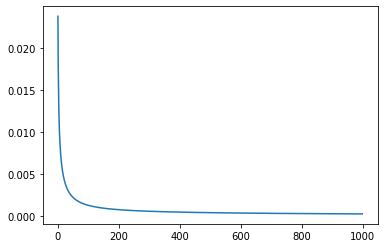

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 97.3404255319149 %


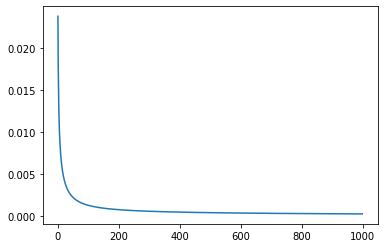

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 96.27659574468085 %


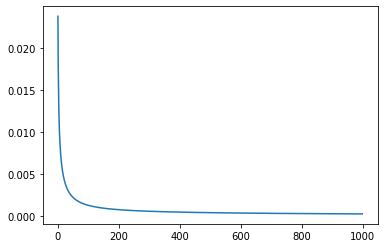

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 97.87234042553192 %


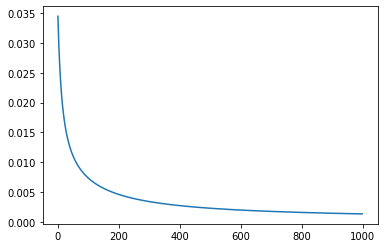

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 98.93617021276596 %


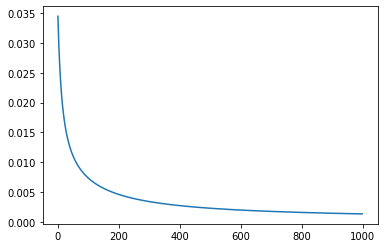

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 98.40425531914893 %


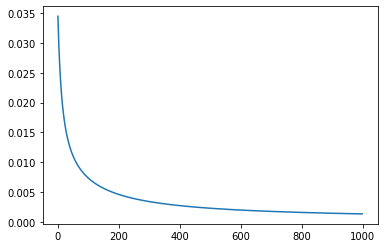

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 96.80851063829788 %


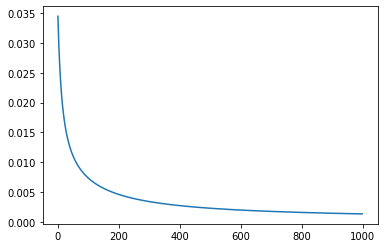

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 95.74468085106383 %


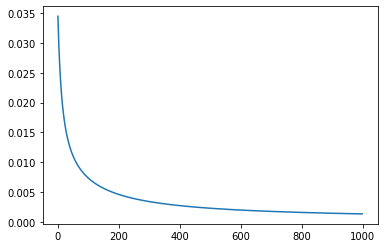

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 94.68085106382979 %


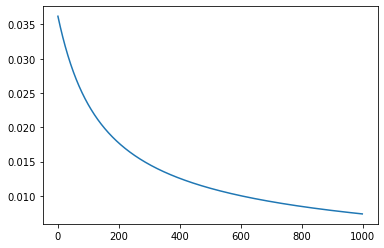

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 96.80851063829788 %


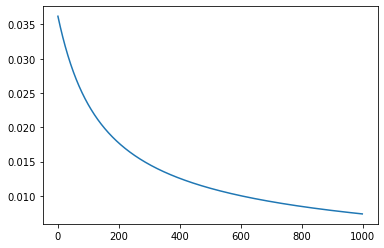

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 96.80851063829788 %


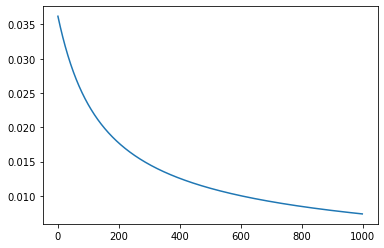

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 94.68085106382979 %


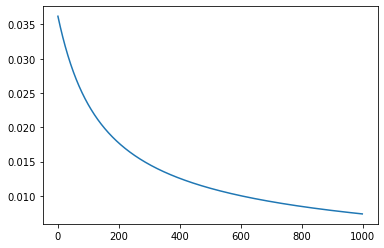

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 93.61702127659575 %


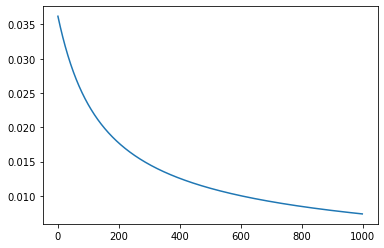

Stochastic


<ipython-input-43-b7a130eae89e>:79: RuntimeWarning: divide by zero encountered in log
  cost=(-1/n_samples)*np.sum((ysgd*np.log(predictions) + (1-ysgd)*np.log(1-predictions)))
<ipython-input-43-b7a130eae89e>:79: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/n_samples)*np.sum((ysgd*np.log(predictions) + (1-ysgd)*np.log(1-predictions)))


For Learning Rate: 0.01 and Threshold: 0.3 Accuracy: 98.40425531914893 %


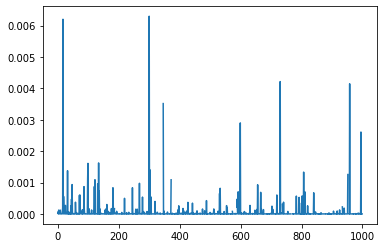

For Learning Rate: 0.01 and Threshold: 0.4 Accuracy: 97.3404255319149 %


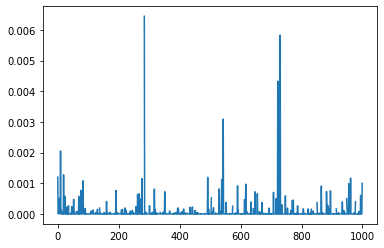

For Learning Rate: 0.01 and Threshold: 0.5 Accuracy: 96.80851063829788 %


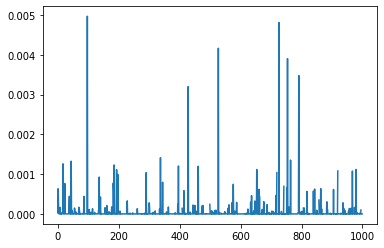

For Learning Rate: 0.01 and Threshold: 0.6 Accuracy: 96.80851063829788 %


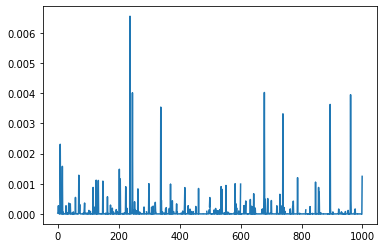

For Learning Rate: 0.01 and Threshold: 0.7 Accuracy: 96.80851063829788 %


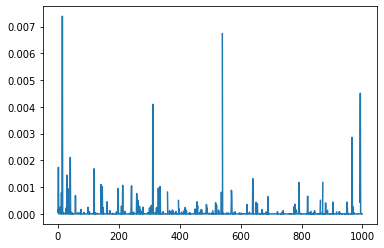

For Learning Rate: 0.001 and Threshold: 0.3 Accuracy: 97.87234042553192 %


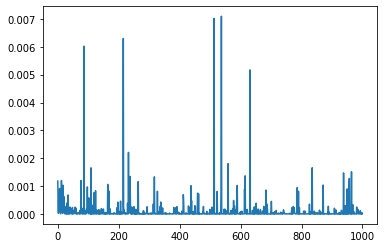

For Learning Rate: 0.001 and Threshold: 0.4 Accuracy: 98.40425531914893 %


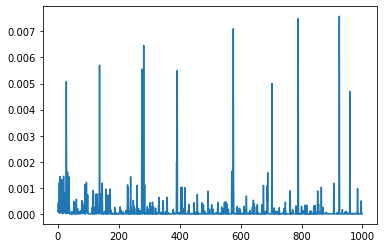

For Learning Rate: 0.001 and Threshold: 0.5 Accuracy: 97.87234042553192 %


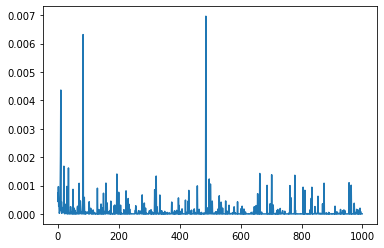

For Learning Rate: 0.001 and Threshold: 0.6 Accuracy: 97.87234042553192 %


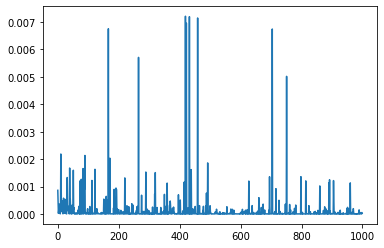

For Learning Rate: 0.001 and Threshold: 0.7 Accuracy: 96.27659574468085 %


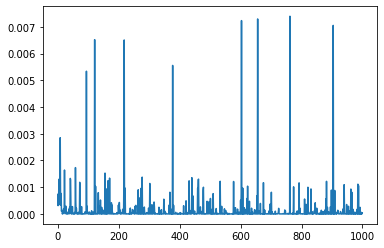

For Learning Rate: 0.0001 and Threshold: 0.3 Accuracy: 97.87234042553192 %


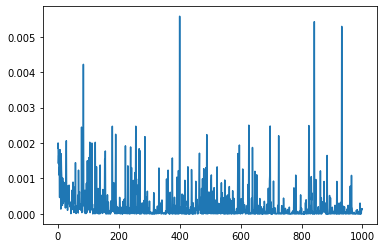

For Learning Rate: 0.0001 and Threshold: 0.4 Accuracy: 98.93617021276596 %


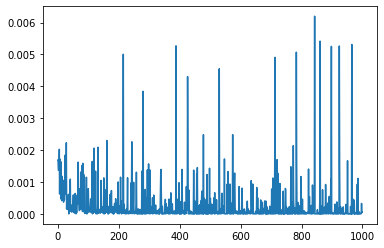

For Learning Rate: 0.0001 and Threshold: 0.5 Accuracy: 98.40425531914893 %


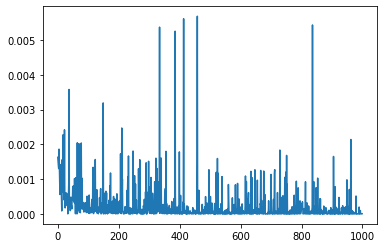

For Learning Rate: 0.0001 and Threshold: 0.6 Accuracy: 96.80851063829788 %


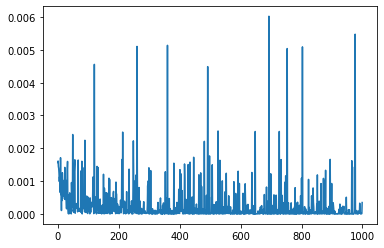

For Learning Rate: 0.0001 and Threshold: 0.7 Accuracy: 96.80851063829788 %


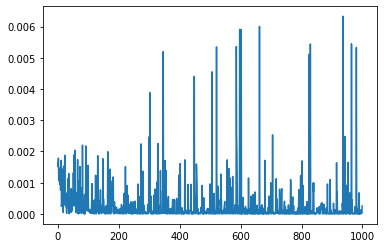

In [ ]:
l=[0.01,0.001,0.0001]
t=[0.3,0.4,0.5,0.6,0.7]
def accuracy (y_pred, y_test):
  return np.sum (y_pred==y_test)/len(y_test)

print("Batch")
for i in l:
  for j in t:
    LR2= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c,e=LR2.batchfit(X_train, y_train)
    y_pred=LR2.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()
print("Mini Batch")
for i in l:
  for j in t:
    LR2= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c,e=LR2.minifit(X_train, y_train)
    y_pred=LR2.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()
print("Stochastic")
for i in l:
  for j in t:
    LR2= LogisticRegression(lr=i,p_thresh=j) #give diff learning rates and prob thresholds
    c,e=LR2.sgdfit(X_train, y_train)
    y_pred=LR2.predict(X_test)
    acc= accuracy(y_pred, y_test)
    print ("For Learning Rate:",i,"and Threshold:",j,"Accuracy:",acc*100,"%")
    costs=np.squeeze(c)
    plt.plot(c)
    plt.show()